## Import data ##

Data from Cape Coast University survey Adams Osman.

Data comprises surveys of various medical supply outletsy, OTC (over the counter), registered Pharmacy and registered suppliers.  

Survey was conducted by visiting a selection of phasrmacies and OTCs, asking about their supplier, then visiting that supplier.  Suppliers of suppliers were not visited.

G is  a networkx directed Graph object, 
codex lists the reference numbers for each supplier/retailer. Ideally this would be the same as the array index +1 because numpy arrays start at 0.  
 
Notice you have to go to the directory where the csv is in order to read it.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import folium
import collections
import pandas as pd
import os
import seaborn as sns
import scipy.stats

In [2]:
# Read pharmacy data from CSV file
pharmacy_data = pd.read_csv('Retailers_Suppliers1_Suppliers2_Final_Edit(1).csv')
pharmacy_data = pharmacy_data.fillna(0) #Fill NAN entries with zeros
pharmacy_data

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,114.0,F1,Pharmacy,6.686896,-1.607081,1,MEK PHARMACY,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.0,F2,Pharmacy,6.670298,-1.590986,2,Kwik save pharmacy,147.0,140.0,0.0,147.0,0.0,0.0,147.0,0.0,0.0
2,94.0,F3,OTC,6.751693,-1.603975,3,David Akuoku Over the counter chemical store,185.0,171.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0
3,68.0,F4,OTC,6.705169,-1.618656,4,Aderic Chemist,181.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0
4,37.0,F5,OTC,6.722547,-1.604707,5,Rukaya Omar otc,171.0,0.0,0.0,171.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.0,0,Supplier,5.626706,0.005751,225,Mystery Supplier 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,0.0,0,Supplier,5.879465,0.174839,226,Life Science Pharma limited_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0,Supplier,5.879465,0.174839,228,Life Sciences_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build Networkx objects ##

G is a networkx directed Graph object, node and links. 
codex lists the reference numbers for each supplier/retailer.

longlat gives geographical locations for plots.

Plot gives a schemaitic map of surveyed pharmacis and connections.


In [3]:
xxxx=pharmacy_data['Infor']
#  G is the main object we work with, a networkx directed Graph object
G=nx.DiGraph()
#reference numbers for each supplier/retailer
codex = np.array(pharmacy_data['Codes']).astype(int)
#  Make separate lists of the suppliers refernece numbers as integers
s1x=np.array(pharmacy_data['S1']).astype(int)
s2x=np.array(pharmacy_data['S2']).astype(int)
s3x=np.array(pharmacy_data['S3']).astype(int)
s4x=np.array(pharmacy_data['S4']).astype(int)
s5x=np.array(pharmacy_data['S5']).astype(int)
s6x=np.array(pharmacy_data['S6']).astype(int)
s7x=np.array(pharmacy_data['S7']).astype(int)
s8x=np.array(pharmacy_data['S8']).astype(int)
s9x=np.array(pharmacy_data['S9']).astype(int)

longlat=np.column_stack((pharmacy_data['longitude'],pharmacy_data['latitude']))
G.add_nodes_from(codex)
positions = dict(zip(G.nodes, longlat))

In [4]:
xlist = [s1x, s2x, s3x, s4x, s5x, s6x, s7x, s8x, s9x]

In [5]:
#  Place edges between supplier and retailers
for nodes in range(codex.size): 
    for i in xlist:
        x = i[nodes]
        if x!=0 : 
            G.add_edge(codex[nodes],x)

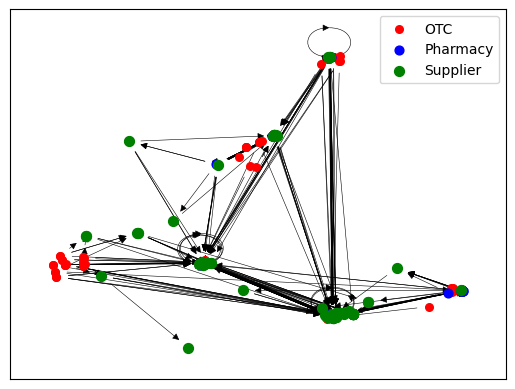

In [6]:
#Draw the Graph
nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='OTC'], node_color="red",node_size=30, label='OTC')
nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='Pharmacy'], node_color="blue",node_size=40, label='Pharmacy')
nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='Supplier'], node_color="green",node_size=50, label='Supplier')

nx.draw_networkx_edges(G, positions, width = 0.4)

plt.rcParams["figure.figsize"] = (12,10)
plt.legend()
plt.show()

## Create map with retailer/supplier locations
Using folium to create an interactive map with locations of the retailer/suppliers for better visulization of the network.

In [7]:
# Create map centered on Ghana
ghana_map = folium.Map(location=[7.9465, -1.0232], zoom_start=7)

# Add markers for each pharmacy location
for index, row in (pharmacy_data[pharmacy_data['Infor'] == 'Pharmacy']).iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='blue'),
                           popup=row['A7_Organisation_Name']).add_to(ghana_map)
    
# Add markers for each OTC location
for index, row in (pharmacy_data[pharmacy_data['Infor'] == 'OTC']).iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='red'),
                           popup=row['A7_Organisation_Name']).add_to(ghana_map)
    
# Add markers for each supplier location
for index, row in (pharmacy_data[pharmacy_data['Infor'] == 'Supplier']).iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='green'),
                           popup=row['A7_Organisation_Name']).add_to(ghana_map)
    
#Add polylines between the locations
edges = list(G.edges()) #list of edges
latlong = [(b, a) for (a, b) in longlat] 
latlong = dict(zip(G.nodes, latlong))
for edge in edges:
    folium.PolyLine(locations=[latlong[edge[0]], latlong[edge[1]]], color='blue', weight=1).add_to(ghana_map)

In [ ]:
# Display the map
ghana_map

## Adjacency Matrix ##
This block builds the adjacency matrix https://en.wikipedia.org/wiki/Adjacency_matrix

In [9]:
am = nx.adjacency_matrix(G)
am = am.todense()
am

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
#Calculate number of links from a node
def linkfrom(node):
    return np.sum(am[node-1, :])
linkfrom(183)

0

In [11]:
#Calculate number of links to a node
def linkto(node):
    return np.sum(am[: , node-1])
linkto(183)

33

In [12]:
#Calculate number of retailers that self supply
print(np.trace(am))
list(nx.nodes_with_selfloops(G)) #check with networkx built in 

6


[138, 139, 140, 158, 166, 178]

In [13]:
#Calculate number of N loops
def nloop(n, am):
    return np.trace(np.linalg.matrix_power(am, n))
nloop(4, am)

6

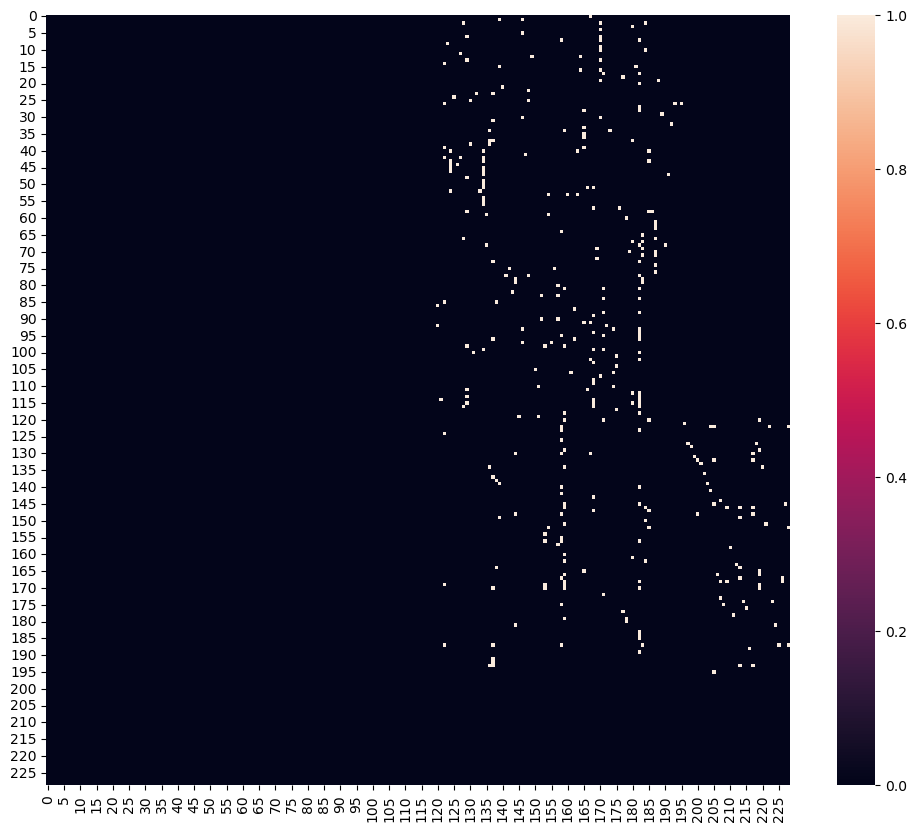

In [14]:
#Plot the adjacency matrix
sns.heatmap(am)
#plt.rcParams["figure.figsize"] = (10,10)
%matplotlib inline

## Length of supply chain(path length)
The distance between 2 nodes, or the path length, can be calculated from the adjacency matrix.

In [15]:
#function to find length of shortest path between 2 nodes
def pathlength(am, i, j):   
    for d in range(1, len(am) + 1):
        # matrix to store paths length
        pm = am.copy()
        for m in range(d - 1):
            pm = pm @ am

        # Check for path length d
        if pm[i-1][j-1] != 0:
            return d  

    return float('inf') #return infinity if no path found

In [16]:
pathlength(am, 5, 160)

2

Use the networkx built in functions instead:

In [17]:
#find the pathlength between 2 nodes
def pathlen(G, sourcenode, targetnode):
    try:
        pathlength = nx.shortest_path_length(G, source=sourcenode, target=targetnode)
        return pathlength
    #return no path if no path is found
    except nx.NetworkXNoPath:
        return 'no path found'

In [18]:
pathlen(G, 41, 211)

4

In [19]:
#find the shortest path and shortest path length in the whole network 
def shortestpath(G):
    pathlist = [[0, 0]]
    pathdict = dict(nx.all_pairs_shortest_path(G))
    for source, shortestpaths in pathdict.items():
        for target, path in shortestpaths.items():
            if source != target:
                if (G.in_degree(path[0]) == 0) and (G.out_degree(path[-1])== 0):
                    if len(path) <= len(pathlist[-1]):
                        pathlist.append(path)
    pathlist = pathlist[1:]
    return pathlist, len(pathlist[0])-1

In [20]:
spaths, spathlen = shortestpath(G)
print(spathlen)
spaths

1


[[8, 183],
 [18, 183],
 [18, 172],
 [21, 183],
 [25, 126],
 [28, 183],
 [29, 183],
 [35, 160],
 [59, 187],
 [60, 136],
 [69, 136],
 [69, 183],
 [69, 191],
 [74, 183],
 [78, 183],
 [82, 183],
 [82, 172],
 [82, 160],
 [85, 183],
 [85, 172],
 [89, 183],
 [89, 172],
 [94, 183],
 [95, 183],
 [96, 183],
 [96, 172],
 [97, 183],
 [99, 160],
 [99, 154],
 [100, 172],
 [101, 183],
 [103, 183],
 [113, 183],
 [114, 183],
 [115, 183],
 [116, 183],
 [117, 183],
 [119, 183],
 [119, 160]]

In [21]:
#find longest path and path length in graph
def longestpath(G):
    #to use the networkx longest path function we need a acyclic directed graph, so we drop the self loop edges first
    GL = G.copy()
    GL.remove_edges_from(list(nx.selfloop_edges(G)))
    return nx.dag_longest_path(GL), nx.dag_longest_path_length(GL)

In [22]:
longestpath(G)

([41, 125, 123, 159, 211], 4)

In [23]:
#find the average path length of the graph
def avglength(G):
    pathlist = []
    pathdict = dict(nx.all_pairs_shortest_path(G))
    for source, shortestpaths in pathdict.items():
        for target, path in shortestpaths.items():
            if source != target:
                if (G.in_degree(path[0]) == 0) and (G.out_degree(path[-1])== 0):
                    pathlist.append(path)
    avg = sum(len(i)-1 for i in pathlist)/len(pathlist)
    return avg

In [24]:
avglength(G)

2.2484342379958244

## Degree distribution ##
This will plot the degree distribution as a histogram  https://en.wikipedia.org/wiki/Degree_distribution


In [25]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

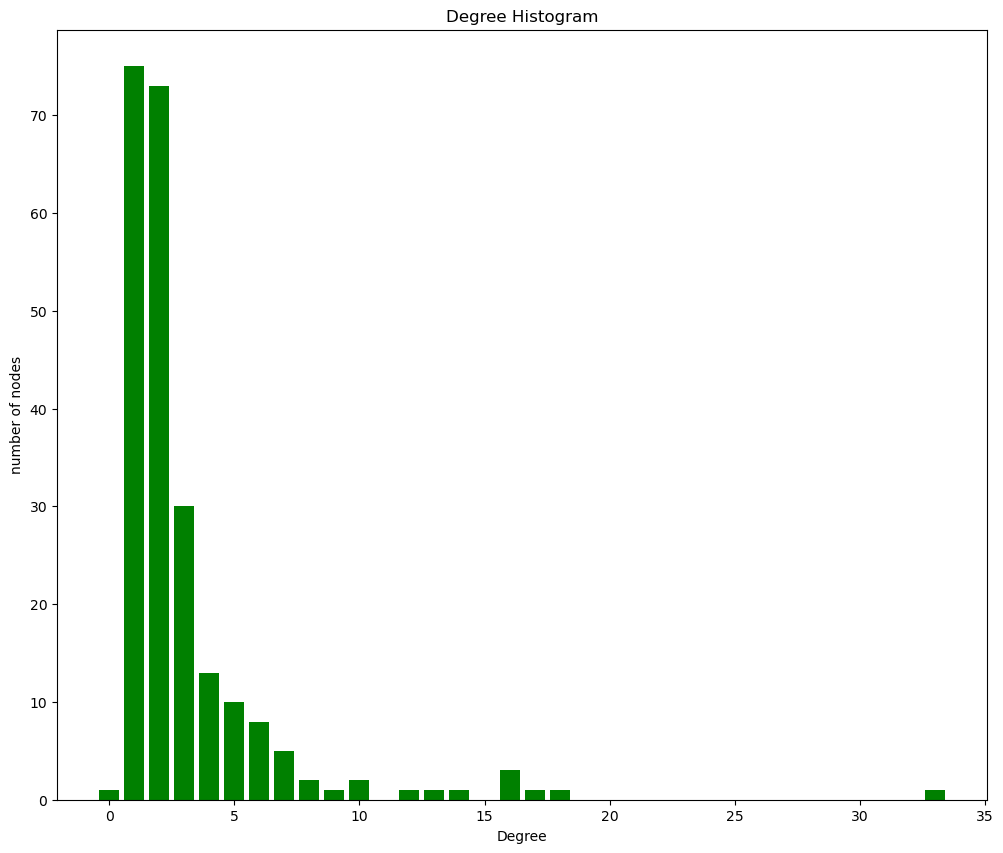

In [26]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='g')

plt.title("Degree Histogram")
plt.ylabel("number of nodes")
plt.xlabel("Degree")
plt.rcParams["figure.figsize"] = (8,6)

plt.show()

In [28]:
#normalizing the degree distribution
cntnorm = np.array(cnt)/sum(cnt)

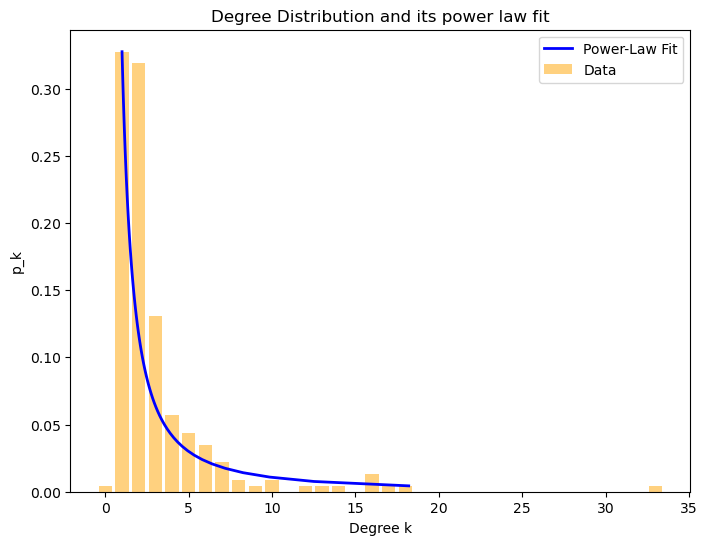

In [29]:
fig, ax = plt.subplots()
plt.bar(deg, cntnorm, width=0.80, color='orange', label = 'Data', alpha = 0.5)

fit = scipy.stats.powerlaw.fit(cntnorm, loc=0, floc=0)
x = np.linspace(min(cntnorm), max(cntnorm), 100)
y = scipy.stats.powerlaw.pdf(x, fit[0], loc=0, scale=fit[2])
plt.plot(y,x, 'b', lw=2, label='Power-Law Fit')

plt.title("Degree Distribution and its power law fit")
plt.ylabel("p_k")
plt.xlabel("Degree k")
plt.legend()
plt.rcParams["figure.figsize"] = (8,6)

plt.show()

Text(0.5, 1.0, 'loglog plot of power law fit of degree distribution')

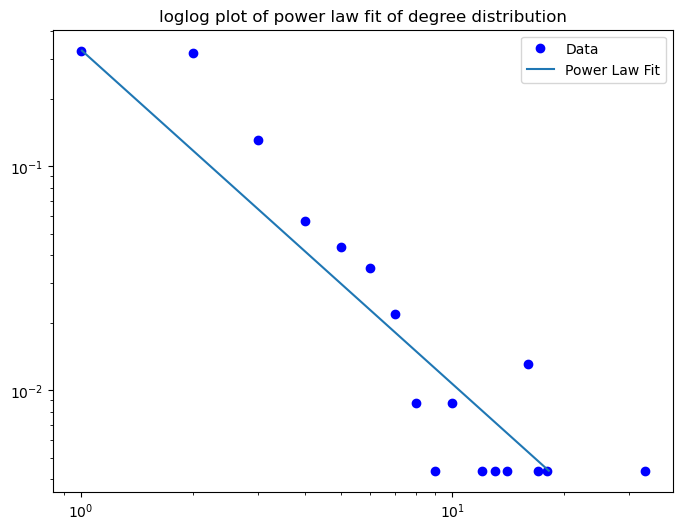

In [30]:
plt.loglog(deg, cntnorm, 'bo', label='Data')
plt.loglog(y, x, label = 'Power Law Fit')

plt.legend()
plt.title('loglog plot of power law fit of degree distribution')

## Centrality
The degree centrality for a node is the fraction of nodes it is connected to.

In [31]:
def deg_centrality(G):
    return dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse = True))  
deg_centrality(G)

{183: 0.14473684210526316,
 169: 0.07894736842105263,
 160: 0.07456140350877193,
 135: 0.07017543859649122,
 159: 0.07017543859649122,
 171: 0.07017543859649122,
 188: 0.06140350877192982,
 123: 0.05701754385964912,
 138: 0.05263157894736842,
 130: 0.043859649122807015,
 147: 0.043859649122807015,
 166: 0.039473684210526314,
 172: 0.03508771929824561,
 184: 0.03508771929824561,
 125: 0.03070175438596491,
 149: 0.03070175438596491,
 168: 0.03070175438596491,
 181: 0.03070175438596491,
 186: 0.03070175438596491,
 121: 0.02631578947368421,
 131: 0.02631578947368421,
 137: 0.02631578947368421,
 140: 0.02631578947368421,
 145: 0.02631578947368421,
 170: 0.02631578947368421,
 185: 0.02631578947368421,
 220: 0.02631578947368421,
 146: 0.021929824561403508,
 153: 0.021929824561403508,
 154: 0.021929824561403508,
 158: 0.021929824561403508,
 167: 0.021929824561403508,
 175: 0.021929824561403508,
 176: 0.021929824561403508,
 194: 0.021929824561403508,
 214: 0.021929824561403508,
 218: 0.02192982

The closeness centrality for a node measures how quickly a node can reach all other nodes in the network.

In [32]:
def clo_centrality(G):
    return dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse = True))  
clo_centrality(G)

{183: 0.21531100478468898,
 160: 0.17625458996328028,
 159: 0.12353801169590642,
 138: 0.08317089018843404,
 211: 0.08268574119863417,
 220: 0.08177702320316921,
 123: 0.0631578947368421,
 208: 0.05949349179400113,
 169: 0.05804953560371517,
 135: 0.05701754385964912,
 229: 0.05637043428242738,
 154: 0.05614035087719298,
 206: 0.05482456140350877,
 227: 0.04833698830409357,
 171: 0.04824561403508772,
 210: 0.04824561403508772,
 137: 0.04797979797979798,
 205: 0.04702012383900928,
 214: 0.04523809523809523,
 223: 0.042172739541160596,
 218: 0.04158544509421702,
 184: 0.04093567251461988,
 172: 0.03654970760233918,
 185: 0.03529657477025898,
 130: 0.03508771929824561,
 188: 0.03508771929824561,
 186: 0.033168859649122806,
 203: 0.033101621979477,
 221: 0.03183885640025991,
 145: 0.029239766081871343,
 181: 0.0268640350877193,
 179: 0.026535087719298245,
 125: 0.02631578947368421,
 166: 0.02631578947368421,
 147: 0.021929824561403508,
 226: 0.02089783281733746,
 168: 0.019736842105263157,

The betweenness centrality for a node measures how often a node acts as a bridge along the shortest paths between other nodes

In [33]:
def btw_centrality(G):
    return dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse = True))  
btw_centrality(G)

{123: 0.0022123038874719836,
 188: 0.001661643094520442,
 169: 0.0013202978076615915,
 159: 0.0010047144292449183,
 135: 0.0009821727593580132,
 171: 0.0009757322822474688,
 125: 0.0007728572532653219,
 147: 0.0005313393616199087,
 170: 0.00038642862663266093,
 137: 0.0003671071953010279,
 168: 0.00034778576396939483,
 149: 0.0002994821856403122,
 181: 0.00027050003864286263,
 184: 0.00027050003864286263,
 131: 0.0002608393229770461,
 130: 0.00022219646031378004,
 179: 0.00021253574464796351,
 145: 0.00019321431331633046,
 153: 0.00019321431331633046,
 186: 0.00019321431331633046,
 121: 0.00018355359765051394,
 176: 0.00017389288198469742,
 185: 0.00017389288198469742,
 148: 0.00013525001932143132,
 144: 0.00011592858798979827,
 166: 0.00011592858798979827,
 175: 0.00011592858798979827,
 155: 9.660715665816523e-05,
 163: 9.660715665816523e-05,
 194: 9.660715665816523e-05,
 167: 8.372620243707655e-05,
 128: 7.728572532653218e-05,
 140: 7.728572532653218e-05,
 146: 6.762500966071566e-05,

/var/folders/_f/jmyfkl9j4s1cl1t9rb26wpnh0000gn/T/ipykernel_36620/372734559.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Betweeness Centrality')


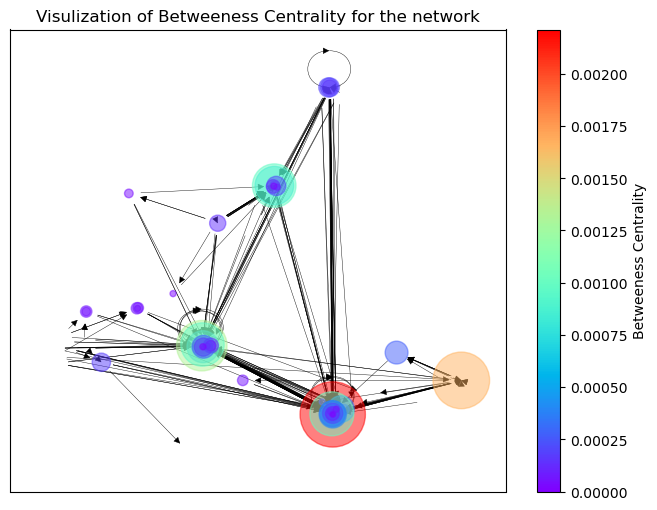

In [34]:
#plot graph G with node size and color based on page rank
colors = [nx.betweenness_centrality(G)[node] for node in G.nodes]
size = [1000000*(nx.betweenness_centrality(G)[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, positions, node_color=colors,cmap=plt.cm.rainbow, node_size=size, alpha = 0.5, vmin=min(colors), vmax=max(colors))
nx.draw_networkx_edges(G, positions, width=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))

plt.rcParams["figure.figsize"] = (12,8)
plt.title('Visulization of Betweeness Centrality for the network')
plt.colorbar(sm, label='Betweeness Centrality')
plt.show()

## Clustering Coefficient 
The clustering coefficient describe the degree to which the neighbors of a specific nodes links to each other, it measures the network's local link density. We'll use the networkx built in function to calculate the clustering coefficient for each node in the graph and the average cluster coefficient for the whole graph.

In [35]:
#calculate the clustering coefficient of a node
def clustering(G, node):
    return nx.clustering(G)[node]

In [36]:
clustering(G, 116)

0.08333333333333333

In [37]:
#list all nodes in graph with CC>0
def listcc(G):
    return {key: value for key, value in (nx.clustering(G)).items() if value > 0}
listcc(G)

{8: 0.16666666666666666,
 72: 0.5,
 95: 0.5,
 99: 0.16666666666666666,
 115: 0.16666666666666666,
 116: 0.08333333333333333,
 117: 0.16666666666666666,
 123: 0.01282051282051282,
 130: 0.011111111111111112,
 131: 0.03333333333333333,
 159: 0.008333333333333333,
 160: 0.003676470588235294,
 168: 0.023809523809523808,
 169: 0.013071895424836602,
 171: 0.004166666666666667,
 183: 0.004734848484848485,
 184: 0.017857142857142856,
 188: 0.016483516483516484,
 229: 0.16666666666666666}

/var/folders/_f/jmyfkl9j4s1cl1t9rb26wpnh0000gn/T/ipykernel_36620/442855045.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Clustering Coefficient')


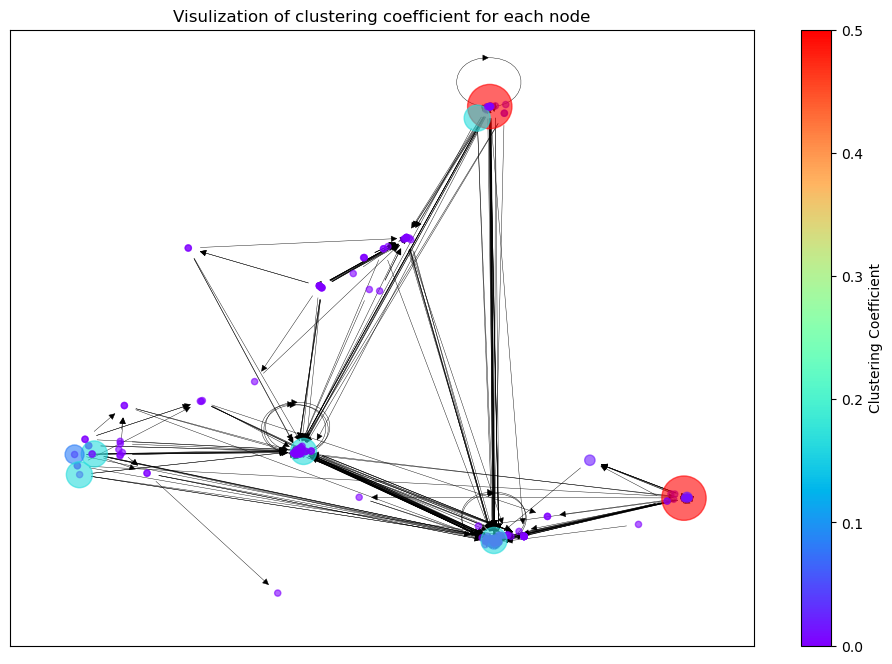

In [38]:
colors = [nx.clustering(G)[node] for node in G.nodes]
size = [2000*(nx.clustering(G)[node]+0.01) for node in G.nodes]
nx.draw_networkx_nodes(G, positions, node_color=colors,cmap=plt.cm.rainbow, node_size=size, alpha = 0.6, vmin=0, vmax=max(colors))
nx.draw_networkx_edges(G, positions, width=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=0, vmax=max(colors)))

plt.rcParams["figure.figsize"] = (12,8)
plt.title('Visulization of clustering coefficient for each node')
plt.colorbar(sm, label='Clustering Coefficient')
plt.show()

In [39]:
def plotcc(G):
    colors = [nx.clustering(G)[node] for node in G.nodes]
    size = [2000*(nx.clustering(G)[node]+0.01) for node in G.nodes]
    nx.draw_networkx_nodes(G, positions, node_color=colors,cmap=plt.cm.rainbow, node_size=size, alpha = 0.6, vmin=0, vmax=max(colors))
    nx.draw_networkx_edges(G, positions, width=0.3)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=0, vmax=max(colors)))

    plt.rcParams["figure.figsize"] = (10,6)
    plt.title('Visulization of clustering coefficient for each node')
    plt.colorbar(sm, label='Clustering Coefficient')
    plt.show()

Calculate the average clustering coefficient of the whole graph:

In [40]:
def avgcc(G):
    return nx.average_clustering(G)
avgcc(G)

0.009022117998164747

Calculate the transitivity(global clustering coefficent) of a graph, it measures the fraction of all possible triangles in G.

In [41]:
def globalcc(G):
    return nx.transitivity(G)
globalcc(G)

0.0205761316872428

## Pagerank
Pagerank calculates a rank for each node in the network based on the structure of incoming links. It is a measure of how important or influential a node is within the network. We'll use the networkx built-in nx.pagerank() function to calculate rankings for the nodes. 
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In [42]:
#Calculate pagerank for graph G, sorted high to low
def pagerank(G):
    return dict(sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse = True))  
pagerank(G)

{138: 0.09706866560237025,
 183: 0.04865533563278765,
 158: 0.03128302644845417,
 160: 0.025677483590176135,
 139: 0.025618646944638782,
 159: 0.02359539806236144,
 211: 0.021802845022381858,
 178: 0.021436585516302984,
 220: 0.015680590943705032,
 169: 0.01561599362678752,
 166: 0.01463500431846726,
 135: 0.013725774762127265,
 123: 0.01288959217887683,
 171: 0.011625824155197854,
 188: 0.011378771142617925,
 208: 0.011330438976394545,
 212: 0.010938455350655176,
 179: 0.010815710829604037,
 154: 0.009071322499397497,
 184: 0.008544027997680396,
 203: 0.008407125225728434,
 172: 0.00840502410610088,
 185: 0.008313235308376393,
 137: 0.007838165589016292,
 181: 0.007685416377355888,
 130: 0.007549449447628999,
 140: 0.007448194947494151,
 214: 0.007185760037303252,
 206: 0.0070698530533007614,
 229: 0.006461623983435234,
 186: 0.006231016110602777,
 176: 0.006190657878439382,
 147: 0.005943604865859451,
 227: 0.005927285657601647,
 145: 0.0059159796331594025,
 205: 0.005837624952253733

In [45]:
#Try reversing the direction of edges for pagerank calc
RG = nx.reverse(G)
pagerank(RG)

{27: 0.010746877104964627,
 120: 0.010216439739163826,
 16: 0.009179227511752512,
 13: 0.008690341100038494,
 76: 0.008579063259222633,
 54: 0.008482779063165599,
 123: 0.008102925668724512,
 107: 0.007886218210839508,
 78: 0.00783538523999188,
 53: 0.007770828702394153,
 188: 0.007754788632780827,
 115: 0.0077294418340116975,
 58: 0.007656864124055689,
 128: 0.00760786994914975,
 175: 0.00760786994914975,
 20: 0.007570123441577667,
 71: 0.0074118984441918665,
 24: 0.007383874233510573,
 101: 0.007322324059945193,
 43: 0.0073215031864944935,
 111: 0.007249969107856181,
 93: 0.00719602959759289,
 35: 0.006919072991507017,
 140: 0.006619654739521284,
 26: 0.0065698510109336965,
 69: 0.006482915444831607,
 98: 0.0064170445721917525,
 41: 0.006372363735322812,
 135: 0.006240092715044437,
 169: 0.006224624182929339,
 52: 0.006078589265789295,
 12: 0.006052214135715032,
 146: 0.006025035480550314,
 94: 0.005999833383782257,
 45: 0.005984927705264875,
 59: 0.005979067332251788,
 39: 0.0059247

/var/folders/_f/jmyfkl9j4s1cl1t9rb26wpnh0000gn/T/ipykernel_36620/4211549016.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='PageRank')


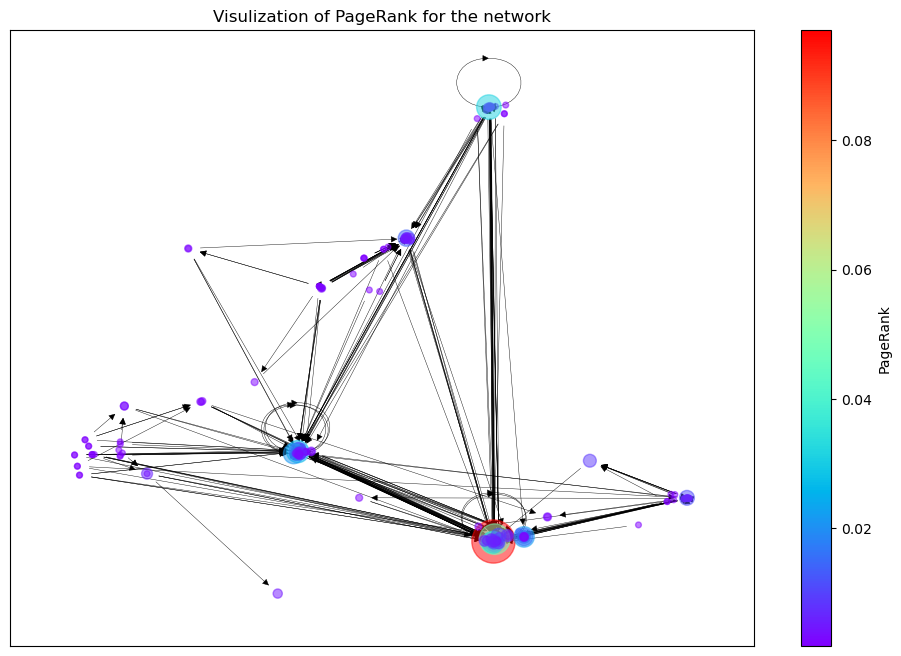

In [43]:
#plot graph G with node size and color based on page rank
colors = [nx.pagerank(G)[node] for node in G.nodes]
size = [10000*(nx.pagerank(G)[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, positions, node_color=colors,cmap=plt.cm.rainbow, node_size=size, alpha = 0.5, vmin=min(colors), vmax=max(colors))
nx.draw_networkx_edges(G, positions, width=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))

plt.rcParams["figure.figsize"] = (12,8)
plt.title('Visulization of PageRank for the network')
plt.colorbar(sm, label='PageRank')
plt.show()

Text(0.5, 0, 'PageRank')

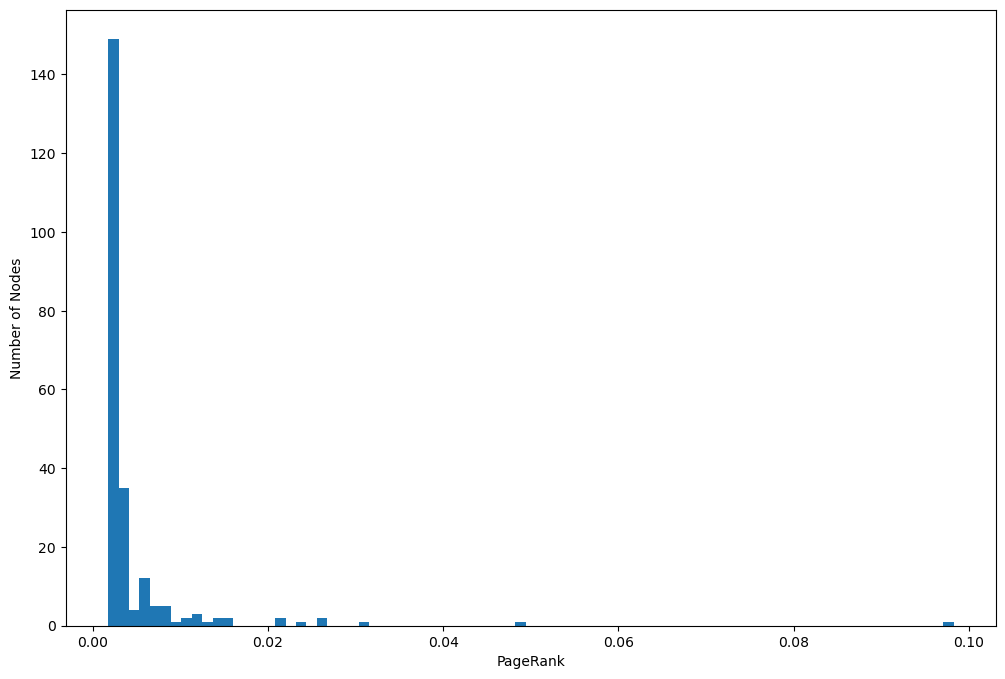

In [72]:
#making a bar plot 
numbins = 80
minp = min(pagerank(G).values())
maxp = max(pagerank(G).values())

width = (maxp - minp) / numbins
bins = [minp + i * width for i in range(numbins)]
bins.append(maxp)
#Initialize the counts
counts = {i: 0 for i in range(numbins+1)}
for node, value in pagerank(G).items():
        ind = int((value - minp) / width)
        counts[ind] += 1

plt.bar(bins[:], counts.values(), width=width, align='edge')
plt.ylabel('Number of Nodes')
plt.xlabel('PageRank')

In [66]:
counts

{0: 213, 1: 8, 2: 5, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1}

### The Google Matrix

In [39]:
nx.google_matrix(G)

array([[0.00065502, 0.00065502, 0.00065502, ..., 0.00065502, 0.00065502,
        0.00065502],
       [0.00065502, 0.00065502, 0.00065502, ..., 0.00065502, 0.00065502,
        0.00065502],
       [0.00065502, 0.00065502, 0.00065502, ..., 0.00065502, 0.00065502,
        0.00065502],
       ...,
       [0.00436681, 0.00436681, 0.00436681, ..., 0.00436681, 0.00436681,
        0.00436681],
       [0.00436681, 0.00436681, 0.00436681, ..., 0.00436681, 0.00436681,
        0.00436681],
       [0.00436681, 0.00436681, 0.00436681, ..., 0.00436681, 0.00436681,
        0.00436681]])

## Network by Region
Pharmacies/OTCs are separated roughly into six regions, a Graph object is created for each region. 

First create some useful functions to reuse for every region. 

In [40]:
#function to extract suppliers information from dataframe
def extractsupp(df):
    slist = df[['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']].stack().unique().astype(int)
    return pharmacy_data[pharmacy_data['Codes'].isin(slist)]

In [41]:
def concatdf(df):
    sdf = extractsupp(df)
    ssdf = extractsupp(sdf)
    sssdf = extractsupp(ssdf)
    fdf = pd.concat([df, sdf, ssdf, sssdf], ignore_index=True)
    fdf = fdf.drop_duplicates()
    return fdf 

In [42]:
#function to create a graph from a specified dataframe
def makegraph(df):
    xxxx=df['Infor']
    #  G is the main object we work with, a networkx directed Graph object
    G=nx.DiGraph()
    #reference numbers for each supplier/retailer
    codex = np.array(df['Codes']).astype(int)
    #  Make separate lists of the suppliers refernece numbers as integers
    s1x=np.array(df['S1']).astype(int)
    s2x=np.array(df['S2']).astype(int)
    s3x=np.array(df['S3']).astype(int)
    s4x=np.array(df['S4']).astype(int)
    s5x=np.array(df['S5']).astype(int)
    s6x=np.array(df['S6']).astype(int)
    s7x=np.array(df['S7']).astype(int)
    s8x=np.array(df['S8']).astype(int)
    s9x=np.array(df['S9']).astype(int)

    longlat=np.column_stack((df['longitude'],df['latitude']))
    G.add_nodes_from(codex)
    positions = dict(zip(G.nodes, longlat))
    
    xlist = [s1x, s2x, s3x, s4x, s5x, s6x, s7x, s8x, s9x]
    #  Place edges between supplier and retailers
    for nodes in range(codex.size): 
        for i in xlist:
            x = i[nodes]
            if x!=0 : 
                G.add_edge(codex[nodes],x)
    return G, xxxx, codex, positions 

In [43]:
#function to draw graph
def drawgraph(G):
    nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='OTC'], node_color="red",node_size=30, label='OTC')
    nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='Pharmacy'], node_color="blue",node_size=40, label='Pharmacy')
    nx.draw_networkx_nodes(G, positions, nodelist=codex[xxxx=='Supplier'], node_color="green",node_size=50, label='Supplier')

    nx.draw_networkx_edges(G, positions)
    
    plt.rcParams["figure.figsize"] = (12,10)
    plt.legend()
    plt.show()

In [44]:
#function to draw map
def drawmap(df, G):
    m = folium.Map(location=[7.9465, -1.0232], zoom_start=7)
    # Add markers for each pharmacy location
    for index, row in (df[df['Infor'] == 'Pharmacy']).iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='blue'),
                           popup=row['A7_Organisation_Name']).add_to(m)
    
    # Add markers for each OTC location
    for index, row in (df[df['Infor'] == 'OTC']).iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='red'),
                           popup=row['A7_Organisation_Name']).add_to(m)
    
    # Add markers for each supplier location
    for index, row in (df[df['Infor'] == 'Supplier']).iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], 
                           icon=folium.Icon(color='green'),
                           popup=row['A7_Organisation_Name']).add_to(m)
        
    #Add polylines between the locations
    edges = list(G.edges()) #list of edges
    latlong=np.column_stack((df['latitude'], df['longitude']))
    latlong = dict(zip(G.nodes, latlong))
    for edge in edges:
        folium.PolyLine(locations=[latlong[edge[0]], latlong[edge[1]]], color='blue', weight=1).add_to(m)
    # Display the map
    return m

### Upper East Region
Select the pharmacies/OTCs with latitude higher than 10.5

In [45]:
#Extract the retailers in upper east region
uppereastdf = pharmacy_data[(pharmacy_data['latitude']>10) & (pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the upper east region retailers
uppereastdf = concatdf(uppereastdf)
uppereastdf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,82.0,F55,OTC,11.062912,-0.230438,55,BUCAS,135.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0
1,56.0,F81,OTC,11.046448,-0.248158,81,Alice Apasiba Azongo,158.0,0.0,0.0,158.0,0.0,0.0,158.0,0.0,0.0
2,36.0,F82,OTC,11.061507,-0.240374,82,Hassan YAHAYA LICENSED CHEMIST,183.0,0.0,0.0,172.0,0.0,0.0,160.0,0.0,0.0
3,112.0,F83,OTC,11.053119,-0.243561,83,IBRAHIM SALAMATU OTC,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55.0,F84,OTC,11.054141,-0.264993,84,Atuut Abuguri OTC,153.0,0.0,0.0,158.0,0.0,0.0,158.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0,Supplier,5.626706,0.005751,223,Bliss GV Pharma limited_Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0,Supplier,5.626706,0.005751,224,Attar Global_India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0,Supplier,5.575025,-0.211214,229,Amponsah Effah Pharmaceuticals_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


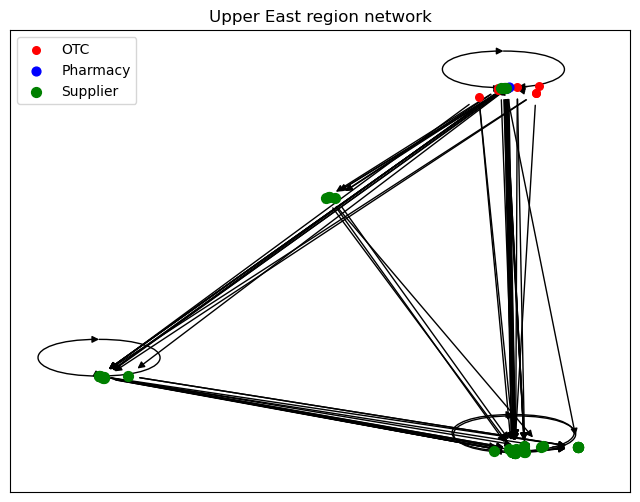

In [46]:
#Create the network graph G1
G1, xxxx, codex, positions = makegraph(uppereastdf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Upper East region network')
drawgraph(G1)

In [47]:
#Display map
drawmap(uppereastdf, G1)

### Tamale-Buipe Region
Select the pharmacies/OTCs with latitude between 8.5 and 10.0, longitude larger than -2.4.

In [48]:
tbdf = pharmacy_data[(pharmacy_data['latitude']>8.5) & (pharmacy_data['latitude']<10)&(pharmacy_data['longitude']>-2.4) &(pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the Tamale-Buipe region retailers
tbdf = concatdf(tbdf)
tbdf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,13.0,F41,OTC,8.789498,-1.466447,41,Enye Maho)dene chemicals,186.0,125.0,135.0,186.0,125.0,135.0,164.0,125.0,135.0
1,62.0,F42,OTC,8.776213,-1.455993,42,Hayford Mensah,148.0,0.0,0.0,148.0,0.0,0.0,148.0,0.0,0.0
2,108.0,F43,OTC,9.262246,-1.008211,43,Shahadu Adams,135.0,128.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83.0,F44,OTC,8.772583,-1.454515,44,Abdulai Hardi Nyalabah,186.0,0.0,0.0,135.0,0.0,0.0,125.0,0.0,0.0
4,109.0,F45,OTC,9.290427,-0.975414,45,Mohammed Adam Abudu,127.0,125.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0,Supplier,5.626706,0.005751,223,Bliss GV Pharma limited_Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0,Supplier,5.575025,-0.211214,229,Amponsah Effah Pharmaceuticals_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0,Supplier,5.626706,0.005751,203,Mangalam Drugs and Organics Limited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


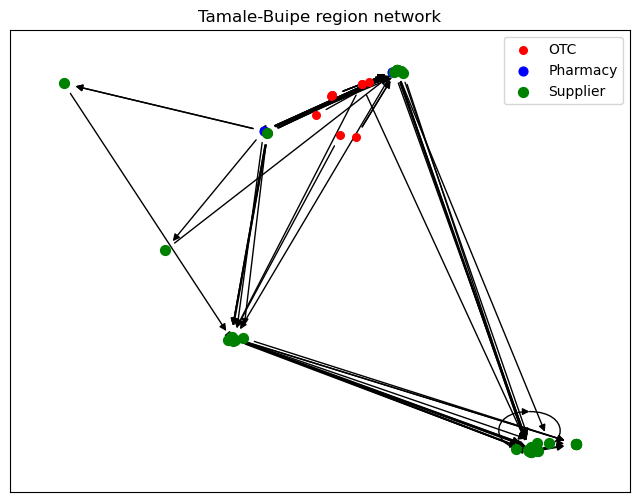

In [49]:
#Create the network graph G2
G2, xxxx, codex, positions = makegraph(tbdf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Tamale-Buipe region network')
drawgraph(G2)

In [50]:
#Display map
drawmap(tbdf, G2)

### Volta Region
Select the pharmacies/OTCs with longitude larger than 0.48.

In [51]:
vrdf = pharmacy_data[(pharmacy_data['longitude']>0.48) &(pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the Volta region retailers
vrdf = concatdf(vrdf)

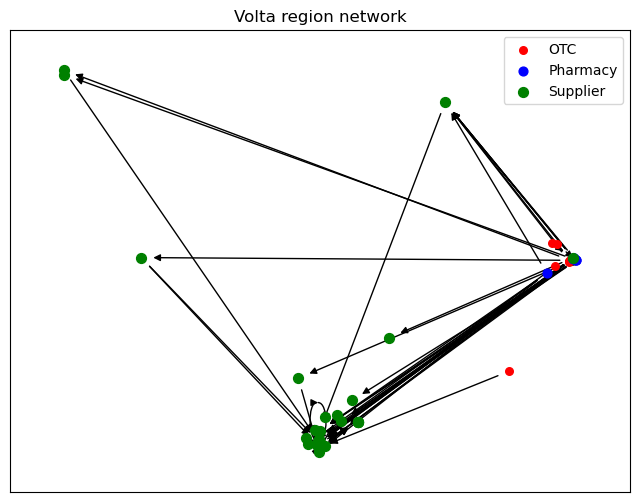

In [52]:
#Create the network graph G3
G3, xxxx, codex, positions = makegraph(vrdf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Volta region network')
drawgraph(G3)

In [53]:
#Display map
drawmap(vrdf, G3)

### Accra Region
Select the pharmacies/OTCs with latitude < 6.10, longitude < 0.48.

In [54]:
accradf = pharmacy_data[(pharmacy_data['latitude']<6.1) &(pharmacy_data['longitude']<0.48) &(pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the Accra region retailers
accradf = concatdf(accradf)

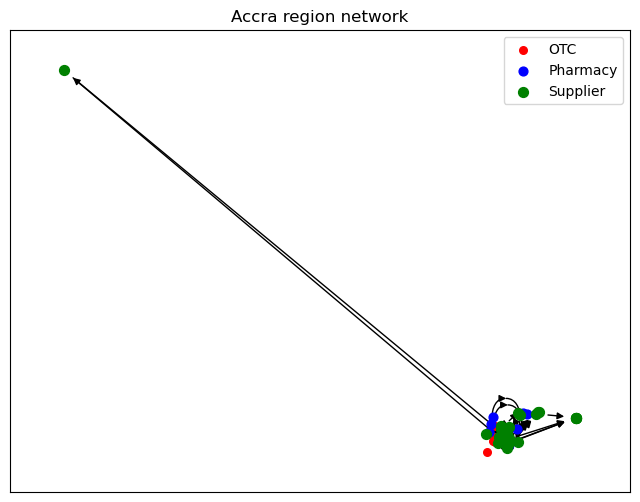

In [55]:
#Create the network graph G4
G4, xxxx, codex, positions = makegraph(accradf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Accra region network')
drawgraph(G4)

In [56]:
#Display map
drawmap(accradf, G4)

### Kumasi Region
Select the pharmacies/OTCs with 6.66 < latitude < 6.77, -1.66 < longitude < -1.52.

In [57]:
kumasidf = pharmacy_data[(pharmacy_data['latitude']<6.77) &(pharmacy_data['latitude']>6.66)&(pharmacy_data['longitude']<-1.52) &(pharmacy_data['longitude']>-1.66)&(pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the Kumasi region retailers
kumasidf = concatdf(kumasidf)
kumasidf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,114.0,F1,Pharmacy,6.686896,-1.607081,1,MEK PHARMACY,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.0,F2,Pharmacy,6.670298,-1.590986,2,Kwik save pharmacy,147.0,140.0,0.0,147.0,0.0,0.0,147.0,0.0,0.0
2,94.0,F3,OTC,6.751693,-1.603975,3,David Akuoku Over the counter chemical store,185.0,171.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0
3,68.0,F4,OTC,6.705169,-1.618656,4,Aderic Chemist,181.0,0.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0
4,37.0,F5,OTC,6.722547,-1.604707,5,Rukaya Omar otc,171.0,0.0,0.0,171.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,0,Supplier,5.626706,0.005751,225,Mystery Supplier 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0,Supplier,5.575025,-0.211214,229,Amponsah Effah Pharmaceuticals_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0,Supplier,5.641554,-0.178377,208,Novartis Ghana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


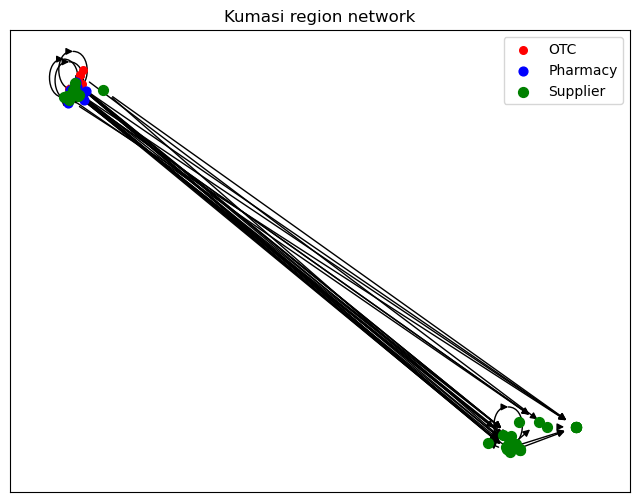

In [58]:
#Create the network graph G5
G5, xxxx, codex, positions = makegraph(kumasidf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Kumasi region network')
drawgraph(G5)

In [59]:
#Display map
drawmap(kumasidf, G5)

### Western North Region
Select the pharmacies/OTCs with latitude < 7.28, longitude < -2.71.

In [60]:
wndf = pharmacy_data[(pharmacy_data['latitude']<7.28) &(pharmacy_data['longitude']<-2.71) &(pharmacy_data['Infor'].isin(['Pharmacy', 'OTC']))]
#Suppliers of the Western North region retailers
wndf = concatdf(wndf)
wndf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,119.0,F64,OTC,6.520290,-3.214840,64,Evelyn Nyamadi,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86.0,F101,OTC,6.520290,-3.214840,101,Francis kofi Osei,183.0,0.0,0.0,132.0,0.0,0.0,183.0,0.0,0.0
2,116.0,F102,OTC,6.686925,-2.890278,102,Adu Moses,176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,F103,OTC,6.668493,-3.109823,103,Joseph Appiah Kobbi,168.0,0.0,0.0,183.0,0.0,0.0,0.0,0.0,0.0
4,44.0,F104,OTC,6.798953,-2.905178,104,Peter Tuffour,169.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0,Supplier,5.575025,-0.211214,229,Amponsah Effah Pharmaceuticals_Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0,Supplier,5.576033,-0.278855,205,Unicom Chemist limited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0,Supplier,5.626706,0.005751,211,IPCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0,Supplier,5.566279,-0.210515,212,Shalina Laboratories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


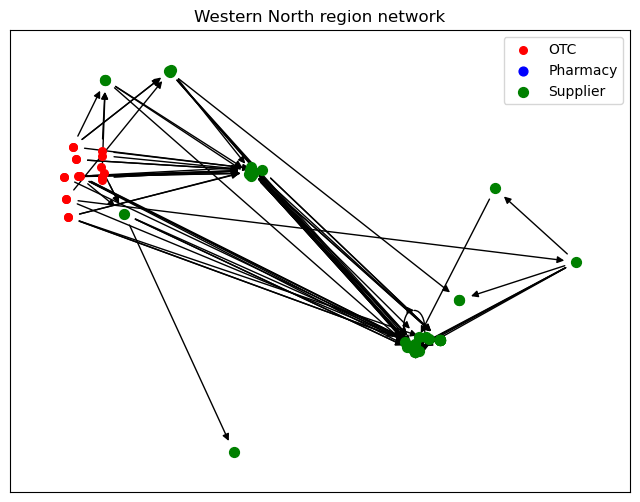

In [61]:
#Create the network graph G6
G6, xxxx, codex, positions = makegraph(wndf)
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Western North region network')
drawgraph(G6)

In [62]:
#Display map
drawmap(wndf, G6)

## Network by Medicine Type
Column S1-S3 are used for cheap medicine, S4-S6 for intermediate medicine, and S7-S9 for expensive medicine.

In [63]:
#function to create a graph for each medicine type
def makegraph(df, c1, c2, c3):
    xxxx=df['Infor']
    #  G is the main object we work with, a networkx directed Graph object
    G=nx.DiGraph()
    #reference numbers for each supplier/retailer
    codex = np.array(df['Codes']).astype(int)
    #  Make separate lists of the suppliers refernece numbers as integers
    s1x=np.array(df[c1]).astype(int)
    s2x=np.array(df[c2]).astype(int)
    s3x=np.array(df[c3]).astype(int)

    longlat=np.column_stack((df['longitude'],df['latitude']))
    G.add_nodes_from(codex)
    positions = dict(zip(G.nodes, longlat))
    
    xlist = [s1x, s2x, s3x]
    #  Place edges between supplier and retailers
    for nodes in range(codex.size): 
        for i in xlist:
            x = i[nodes]
            if x!=0 : 
                G.add_edge(codex[nodes],x)
    return G, xxxx, codex, positions 

In [64]:
#function to extract suppliers information from dataframe
def extractsupp(df, data, clist):
    slist = df[clist].stack().unique().astype(int)
    return data[data['Codes'].isin(slist)]
def concatdf(df, data, clist):
    sdf = extractsupp(df, data, clist)
    ssdf = extractsupp(sdf, data, clist)
    sssdf = extractsupp(ssdf, data, clist)
    fdf = pd.concat([df, sdf, ssdf, sssdf], ignore_index=True)
    fdf = fdf.drop_duplicates()
    return fdf 

In [65]:
#A list of strings with column name for function input
clist = ["S1","S2","S3",'S4','S5','S6','S7','S8','S9']

### Cheap Medicine

In [66]:
#Drop Columns S4-S9
cdata = pharmacy_data
cdata = cdata.drop(columns =['S4','S5','S6','S7','S8','S9'])
cheapdf = cdata[cdata['Infor'].isin(['Pharmacy', 'OTC'])]
cheapdf = concatdf(cheapdf, cdata, clist[:3])
cheapdf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S1,S2,S3
0,114.0,F1,Pharmacy,6.686896,-1.607081,1,MEK PHARMACY,168.0,0.0,0.0
1,64.0,F2,Pharmacy,6.670298,-1.590986,2,Kwik save pharmacy,147.0,140.0,0.0
2,94.0,F3,OTC,6.751693,-1.603975,3,David Akuoku Over the counter chemical store,185.0,171.0,0.0
3,68.0,F4,OTC,6.705169,-1.618656,4,Aderic Chemist,181.0,0.0,0.0
4,37.0,F5,OTC,6.722547,-1.604707,5,Rukaya Omar otc,171.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
217,0.0,0,Supplier,6.666533,-1.618062,222,Life Sciences Pharmaceuticals_Kumasi,0.0,0.0,0.0
218,0.0,0,Supplier,5.626706,0.005751,224,Attar Global_India,0.0,0.0,0.0
219,0.0,0,Supplier,5.879465,0.174839,226,Life Science Pharma limited_Accra,0.0,0.0,0.0
220,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0


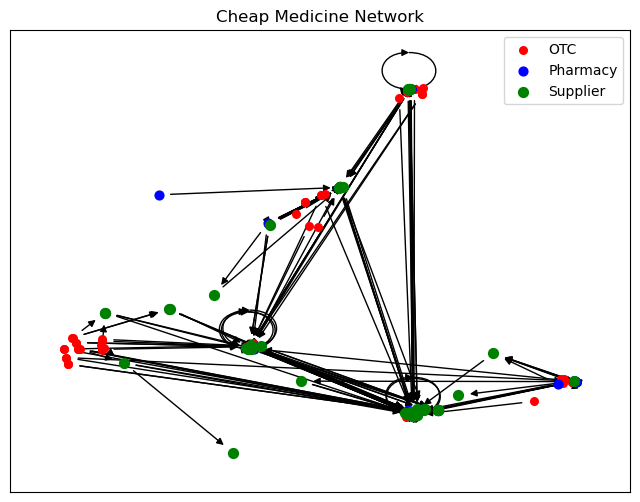

In [67]:
#Create the network graph GMC
GMC, xxxx, codex, positions = makegraph(cheapdf, clist[0], clist[1], clist[2])
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Cheap Medicine Network')
drawgraph(GMC)

In [68]:
#Display map
drawmap(cheapdf, GMC)

In [81]:
#average clustering coefficient for cheap medicine network
avgcc(GMC)

0.0

### Intermediate Priced Medicine

In [129]:
idata = pharmacy_data
idata = idata.drop(columns =['S1','S2','S3','S7','S8','S9'])
interdf = idata[idata['Infor'].isin(['Pharmacy', 'OTC'])]
interdf = concatdf(interdf, idata, clist[3:6])
interdf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S4,S5,S6
0,114.0,F1,Pharmacy,6.686896,-1.607081,1,MEK PHARMACY,0.0,0.0,0.0
1,64.0,F2,Pharmacy,6.670298,-1.590986,2,Kwik save pharmacy,147.0,0.0,0.0
2,94.0,F3,OTC,6.751693,-1.603975,3,David Akuoku Over the counter chemical store,129.0,0.0,0.0
3,68.0,F4,OTC,6.705169,-1.618656,4,Aderic Chemist,181.0,0.0,0.0
4,37.0,F5,OTC,6.722547,-1.604707,5,Rukaya Omar otc,171.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
185,0.0,0,Supplier,5.600167,-0.230468,218,Philips Pharmaceuticals Limited,0.0,0.0,0.0
186,0.0,0,Supplier,5.626706,0.005751,223,Bliss GV Pharma limited_Mumbai,0.0,0.0,0.0
187,0.0,0,Supplier,5.564263,-0.220263,227,Eskay Therapeutics Ltd,0.0,0.0,0.0
188,0.0,0,Supplier,5.879465,0.174839,228,Life Sciences_Accra,0.0,0.0,0.0


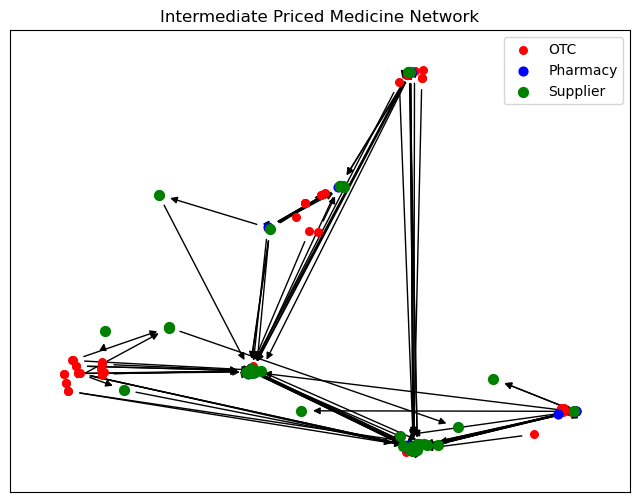

In [130]:
#Create the network graph GIC, and drop the nodes without a connection
GMI, xxxx, codex, positions = makegraph(interdf, clist[3], clist[4], clist[5])

#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Intermediate Priced Medicine Network')
drawgraph(GMI)

In [131]:
#Display map
drawmap(interdf, GMI)

In [132]:
#average clustering coefficient for intermediate medicine network
avgcc(GMI)

0.002944188428059396

In [133]:
listcc(GMI)

{123: 0.023809523809523808, 188: 0.023809523809523808, 229: 0.5}

/var/folders/_f/jmyfkl9j4s1cl1t9rb26wpnh0000gn/T/ipykernel_43418/3911518316.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Clustering Coefficient')


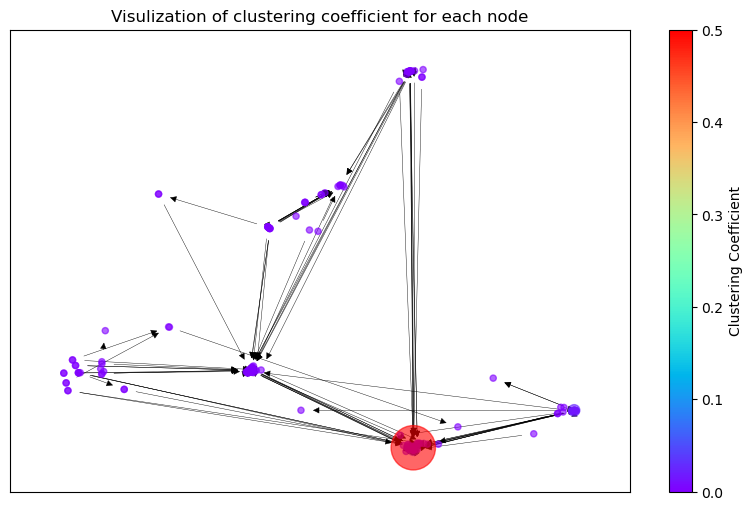

In [135]:
plotcc(GMI)

### Expensive Medicine

In [73]:
#Drop Columns S1-S6
edata = pharmacy_data
edata = edata.drop(columns =['S1','S2','S3','S4','S5','S6'])
expdf = edata[edata['Infor'].isin(['Pharmacy', 'OTC'])]
expdf = concatdf(expdf, edata, clist[6:])
expdf

,OID_,DI,Infor,latitude,longitude,Codes,A7_Organisation_Name,S7,S8,S9
0,114.0,F1,Pharmacy,6.686896,-1.607081,1,MEK PHARMACY,0.0,0.0,0.0
1,64.0,F2,Pharmacy,6.670298,-1.590986,2,Kwik save pharmacy,147.0,0.0,0.0
2,94.0,F3,OTC,6.751693,-1.603975,3,David Akuoku Over the counter chemical store,0.0,0.0,0.0
3,68.0,F4,OTC,6.705169,-1.618656,4,Aderic Chemist,0.0,0.0,0.0
4,37.0,F5,OTC,6.722547,-1.604707,5,Rukaya Omar otc,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
160,58.0,R69,Supplier,5.690240,-0.030330,191,Widama Pharmacy_Accra,0.0,0.0,0.0
161,65.0,R78,Supplier,9.395851,-0.846761,192,Ernest Chemist Ltd_Tamale,0.0,0.0,0.0
162,67.0,R81,Supplier,5.633900,-0.172560,193,Ernest Chemist Ltd_Accra_Shiashi,0.0,0.0,0.0
163,45.0,R55,Supplier,5.547380,-0.209800,196,Shagysco Pharmacy,0.0,0.0,0.0


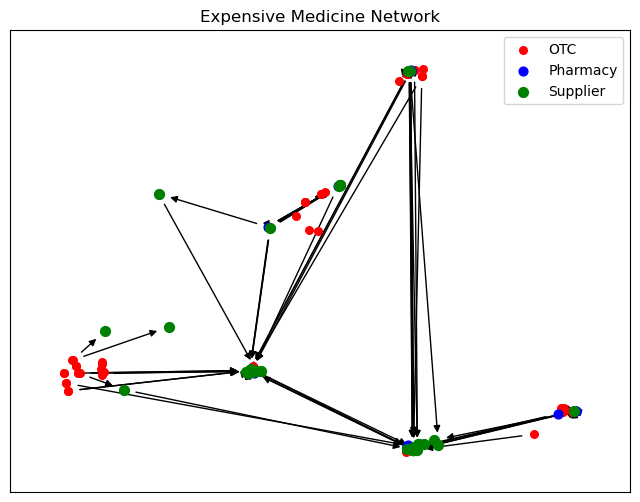

In [74]:
#Create the network graph GEC
GME, xxxx, codex, positions = makegraph(expdf, clist[6], clist[7], clist[8])
#Draw the graph
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Expensive Medicine Network')
drawgraph(GME)

In [75]:
drawmap(expdf, GME)

## Table of  Network Attributes
We now have 10 different networks, includind the whole network, 6 regional sub-networks, and 3 medicine type sub-networks. Various functions to calculate network graph attributes are also created. To make the analysis easier to visualize, these attribute data are collected into a dataframe.

In [76]:
#function to calculate average degree of a graph
def avgdeg(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    avg = sum(x * y for x, y in zip(deg, cnt))/sum(cnt)
    return avg

In [77]:
graphlist = [G, G1, G2, G3, G4, G5, G6, GMC, GMI, GME]
#list to store number of nodes for each graph
numnodes = [G.number_of_nodes() for G in graphlist]
numedges = [G.number_of_edges() for G in graphlist]
avgdegree = [avgdeg(G) for G in graphlist]
#selfloops = [len(list(nx.nodes_with_selfloops(G))) for G in graphlist]
longestpl = [longestpath(G)[1] for G in graphlist]
shortestpl = [shortestpath(G)[1] for G in graphlist]
avgpl = [avglength(G) for G in graphlist]
trans = [globalcc(G) for G in graphlist]
avgclustering = [avgcc(G) for G in graphlist]

In [78]:
#number of node pairs with shortest path length(length =1), number of direct links
num_node_spl = [len(shortestpath(G)[0]) for G in graphlist]
num_node_spl

[39, 15, 1, 5, 5, 3, 9, 22, 90, 80]

In [79]:
#put all data into dataframe
attdata = {'Number of nodes': numnodes, 'Number of edges': numedges, 'Average Degree': avgdegree, 'Longest Path Length': longestpl, 'Shortest Path Length': shortestpl, 'Average Path Length': avgpl, 'Number of direct links(path with length 1)': num_node_spl, 'Transitivity':trans, 'Average Clustering Coefficient':avgclustering}
attdf = pd.DataFrame(attdata)
attdf['Name of Network']=['Whole Network', 'Upper East Region', 'Tamale-Buipe Region', 'Volta region', 'Accra Region', 'Kumasi Region', 'Western North region', 'Cheap Medicine', 'Intermediate Priced Medicine', 'Expensive Medicine']
attdf = (attdf.set_index('Name of Network')).rename_axis(None, axis=0)
attdf

,Number of nodes,Number of edges,Average Degree,Longest Path Length,Shortest Path Length,Average Path Length,Number of direct links(path with length 1),Transitivity,Average Clustering Coefficient
Whole Network,229,348,3.039301,4,1,2.248434,39,0.020576,0.009022
Upper East Region,61,88,2.885246,3,1,2.025974,15,0.013333,0.014364
Tamale-Buipe Region,61,74,2.426230,4,1,2.520000,1,0.000000,0.000000
Volta region,51,65,2.549020,4,1,2.505495,5,0.026786,0.021736
Accra Region,53,67,2.528302,4,1,2.204082,5,0.010204,0.002830
Kumasi Region,64,77,2.406250,3,1,2.064103,3,0.009091,0.003460
Western North region,67,87,2.597015,4,1,2.062500,9,0.030488,0.016828
Cheap Medicine,201,230,2.288557,4,1,2.244898,22,0.000000,0.000000
Intermediate Priced Medicine,186,134,1.440860,3,1,1.442177,90,0.019231,0.002944
Expensive Medicine,165,82,0.993939,2,1,1.012346,80,0.000000,0.000000
